<a href="https://colab.research.google.com/github/pradhangithub/DIVINE/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
%matplotlib inline

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc

In [17]:
df = pd.read_csv("diabetes.csv")

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
df.shape

(768, 9)

9 variable et 768 donnees

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


pas de donnees manquantes

In [22]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Les donnees peu equilibrees

(array([63., 72., 38.,  0., 46., 48., 33.,  0., 32., 35., 29.,  0., 21.,
        24., 16.,  0., 17., 14., 10.,  0., 16., 19., 16.,  0., 12., 13.,
        22.,  0., 18., 13.,  8.,  0., 15., 13.,  6.,  0.,  5.,  5.,  8.,
         0.,  8.,  8.,  5.,  0.,  6.,  4.,  3.,  0.,  5.,  7.,  3.,  0.,
         5.,  2.,  4.,  0.,  4.,  1.,  3.,  0.,  4.,  3.,  1.,  0.,  2.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([21.  , 21.75, 22.5 , 23.25, 24.  , 24.75, 25.5 , 26.25, 27.  ,
        27.75, 28.5 , 29.25, 30.  , 30.75, 31.5 , 32.25, 33.  , 33.75,
        34.5 , 35.25, 36.  , 36.75, 37.5 , 38.25, 39.  , 39.75, 40.5 ,
        41.25, 42.  , 42.75, 43.5 , 44.25, 45.  , 45.75, 46.5 , 47.25,
        48.  , 48.75, 49.5 , 50.25, 51.  , 51.75, 52.5 , 53.25, 54.  ,
        54.75, 55.5 , 56.25, 57.  , 57.75, 58.5 , 59.25, 60.  , 60.75,
        61.5 , 62.25, 63.  , 63.75, 64.5 , 65.25, 66.  , 66.75, 67.5 ,
        68.25, 69.  , 69.75, 70.5 , 71.25, 72

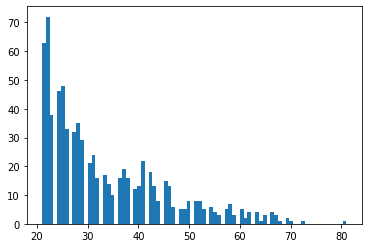

In [23]:
plt.hist(df.Age, bins=80)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


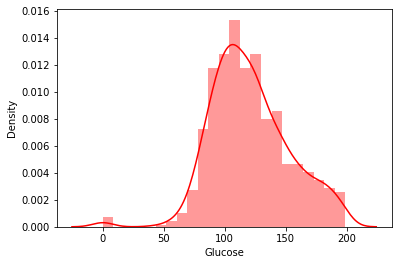

In [24]:
sns.distplot(df.Glucose, color='red')

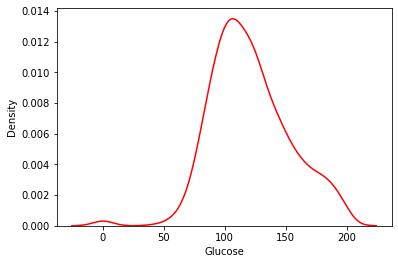

In [25]:
sns.kdeplot(df.Glucose, color='red')

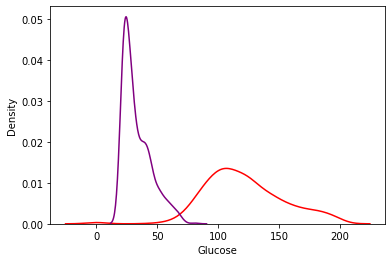

In [26]:
sns.kdeplot(df.Glucose, color='red')
sns.kdeplot(df.Age, color='purple')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


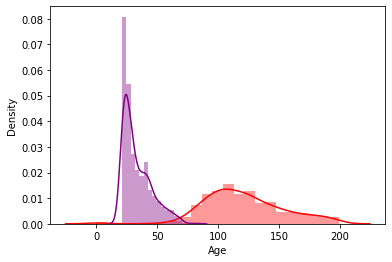

In [27]:
sns.distplot(df.Glucose, color='red')
sns.distplot(df.Age, color='purple')

MODELISATION

In [28]:
x = df.drop(['Outcome'], axis=1)
y = df.Outcome

In [29]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [30]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


REGRESSION LOGISTIQUE

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [34]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_lr = lr .predict(x_test)

In [36]:
print(accuracy_score(y_test,y_lr))

0.7792207792207793


In [37]:
print(confusion_matrix(y_test,y_lr))

[[89 10]
 [24 31]]


In [38]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [39]:
probas = lr.predict_proba(x_test)
print(probas)

[[0.54901656 0.45098344]
 [0.6684535  0.3315465 ]
 [0.82587228 0.17412772]
 [0.95235555 0.04764445]
 [0.80515064 0.19484936]
 [0.74742628 0.25257372]
 [0.63448415 0.36551585]
 [0.88182157 0.11817843]
 [0.85639603 0.14360397]
 [0.82364487 0.17635513]
 [0.55045143 0.44954857]
 [0.92205415 0.07794585]
 [0.02386256 0.97613744]
 [0.25845602 0.74154398]
 [0.95524015 0.04475985]
 [0.2550533  0.7449467 ]
 [0.77918707 0.22081293]
 [0.68247478 0.31752522]
 [0.84663034 0.15336966]
 [0.82850916 0.17149084]
 [0.59652791 0.40347209]
 [0.84406356 0.15593644]
 [0.03924792 0.96075208]
 [0.69859428 0.30140572]
 [0.92562796 0.07437204]
 [0.60321853 0.39678147]
 [0.82157406 0.17842594]
 [0.22476183 0.77523817]
 [0.91768376 0.08231624]
 [0.48633412 0.51366588]
 [0.61037228 0.38962772]
 [0.63419646 0.36580354]
 [0.9348184  0.0651816 ]
 [0.36401321 0.63598679]
 [0.86540137 0.13459863]
 [0.42158397 0.57841603]
 [0.90051329 0.09948671]
 [0.8175226  0.1824774 ]
 [0.88632396 0.11367604]
 [0.39745623 0.60254377]


In [41]:
dfprobas = pd.DataFrame(probas, columns=['proba_0','proba_1'])
dfprobas['y'] = np.array(y_test)

In [43]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probas[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.8402203856749311


In [46]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red' , label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

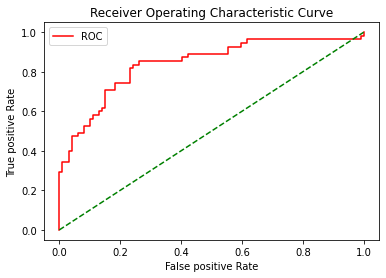

In [47]:
plot_roc_curve(false_positive_rate, true_positive_rate)

RANDOM FOREST

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)

In [ ]:
rf1 = ensemble.RandomForestClassifier(n_estimators=100, min_samples_leaf=10, max_features=5)
rf1.fit(x_train, y_train)
y_rf1 = rf1.predict(x_test)

In [ ]:
rf1_score = accuracy_score(y_test, y_rf1)
print(rf1_score)

0.7922077922077922


In [ ]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[86 13]
 [19 36]]


In [ ]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        99
           1       0.73      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
importances = rf1.feature_importances_
indices = np.argsort(importances)

Text(0.5, 1.0, 'Importance des caracteristiques')

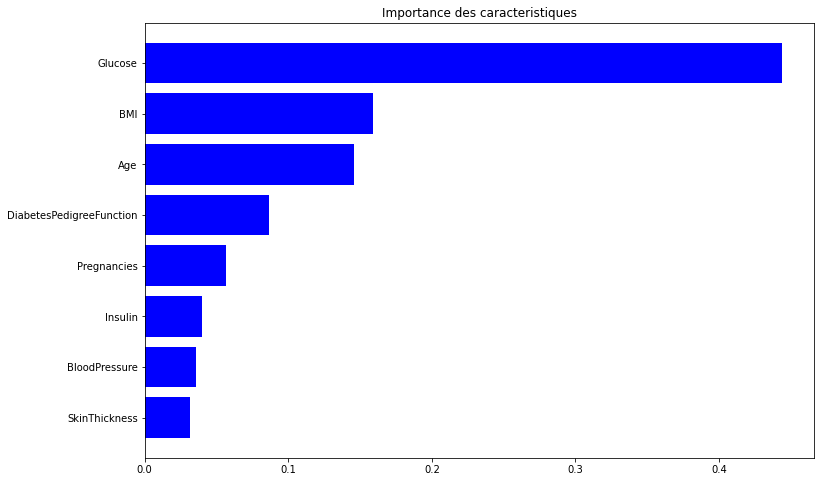

In [ ]:
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Importance des caracteristiques')